目前使用LOP為定義之實驗數據採用33筆，單變數

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
os.getcwd()

'/root/LR_ML'

In [3]:
datafile = u"/root/LR_ML/FinalDataAnalysis.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0)

In [5]:
TIP.head()

,SBPI,SBPL,DBPI,DBPL,BPMI,BPML,LOP
0,116,113,73,71,72,77,118.6
1,132,138,68,81,74,78,130.6
2,105,106,68,63,85,81,107.3
3,114,112,66,64,71,79,119.6
4,133,139,85,87,83,87,144.3


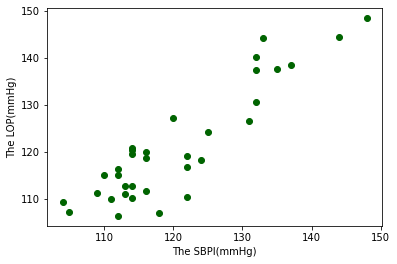

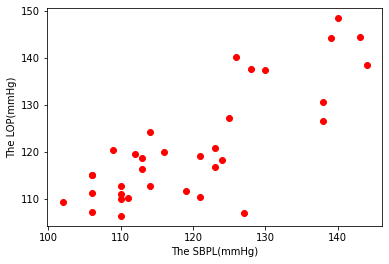

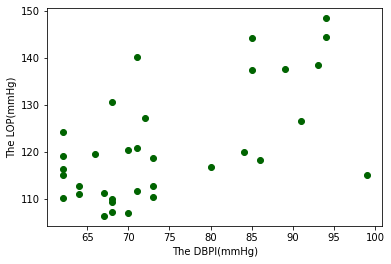

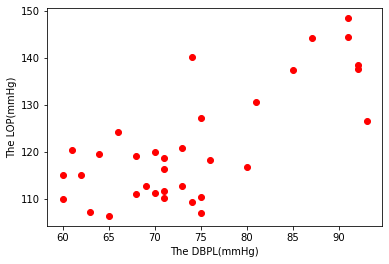

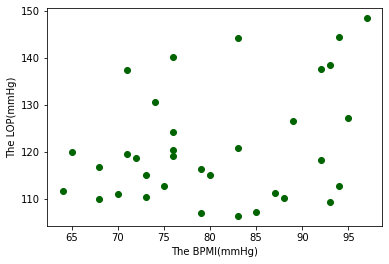

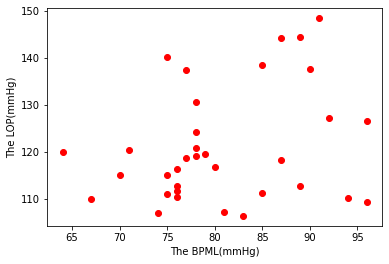

In [6]:
modTIP = TIP
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBPI,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPL,modTIP.LOP,color = 'red',label = "Exam Data")
plt.xlabel("The SBPL(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
# plt.scatter(modTIP.SBPM,modTIP.LOP,color = 'blue',label = "Exam Data")
# plt.xlabel("The SBPM(mmHg)")#設置X軸標籤
# plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
# plt.show()#顯示圖像
plt.scatter(modTIP.DBPI,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The DBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.DBPL,modTIP.LOP,color = 'red',label = "Exam Data")
plt.xlabel("The DBPL(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.BPMI,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The BPMI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.BPML,modTIP.LOP,color = 'red',label = "Exam Data")
plt.xlabel("The BPML(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBPI        SBPL       DBPI       DBPL       BPMI       BPML  \
count   34.000000   34.000000  34.000000  34.000000  34.000000  34.000000   
mean   120.470588  119.911765  74.529412  74.029412  80.411765  80.735294   
std     10.935722   12.041262  11.152484   9.858039   9.680088   8.147537   
min    104.000000  102.000000  62.000000  60.000000  64.000000  64.000000   
25%    113.000000  110.000000  67.000000  68.000000  73.000000  76.000000   
50%    116.000000  117.500000  71.000000  72.000000  79.000000  78.000000   
75%    129.500000  126.750000  84.750000  79.000000  88.750000  87.000000   
max    148.000000  144.000000  99.000000  93.000000  97.000000  96.000000   

              LOP  
count   34.000000  
mean   121.179412  
std     12.128049  
min    106.400000  
25%    111.350000  
50%    118.400000  
75%    127.125000  
max    148.400000  
          SBPI      SBPL      DBPI      DBPL      BPMI      BPML       LOP
SBPI  1.000000  0.915078  0.624775  0.834710  0.308

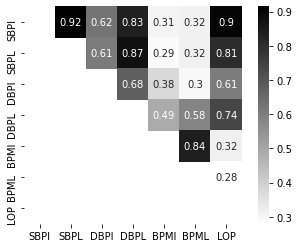

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)
# mask = np.zeros_like(rDf, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(
#     rDf,          # The data to plot
#     mask=mask,     # Mask some cells
#     cmap=cmap,     # What colors to plot the heatmap as
#     annot=True,    # Should the values be plotted in the cells?
#     vmax=.3,       # The maximum value of the legend. All higher vals will be same color
#     vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
#     center=0,      # The center value of the legend. With divergent cmap, where white is
#     square=True,   # Force cells to be square
#     linewidths=.5, # Width of lines that divide cells
#     cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
# )
# with sns.axes_style("white"):
#     f, ax = plt.subplots(figsize=(7, 5))
#     ax = sns.heatmap(rDf, mask=mask, vmax=.3, square=True, cmap="YlGnBu")
matrix = np.tril(rDf)
H = sns.heatmap(modTIP.corr(),annot=True, cmap="gray_r", square=True, mask=matrix)
F = H.get_figure()
F.savefig('heatmap_colored_correlation_matrix_seaborn_python.png')

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [9]:
print(t_test(modTIP.SBPI, modTIP.SBPL))
# print(t_test(modTIP.SBPI, modTIP.SBPM))
# print(t_test(modTIP.SBPL, modTIP.SBPM))
print(t_test(modTIP.DBPI, modTIP.DBPL))
# print(t_test(modTIP.DBPI, modTIP.DBPM))
# print(t_test(modTIP.DBPL, modTIP.DBPM))
print(t_test(modTIP.BPMI, modTIP.BPML))
# print(t_test(modTIP.BPMI, modTIP.BPMM))
# print(t_test(modTIP.BPML, modTIP.BPMM))
print(t_test(modTIP.SBPI, modTIP.LOP))
print(t_test(modTIP.SBPL, modTIP.LOP))
# print(t_test(modTIP.SBPM, modTIP.LOP))
print(t_test(modTIP.DBPI, modTIP.LOP))
print(t_test(modTIP.DBPL, modTIP.LOP))
# print(t_test(modTIP.DBPM, modTIP.LOP))
print(t_test(modTIP.BPMI, modTIP.LOP))
print(t_test(modTIP.BPML, modTIP.LOP))
# print(t_test(modTIP.BPMM, modTIP.LOP))
print(t_test(modTIP.LOP, modTIP.LOP))

(0.2003244810798799, 0.8418428180899292)
(0.19586866633134437, 0.8453147720626033)
(-0.1490994235705828, 0.881929835998742)
(-0.2530945133333057, 0.8009818540065048)
(-0.43249967346973905, 0.6667882243874703)
(-16.509436323154176, 4.008545107875963e-25)
(-17.59080369799654, 1.307386334857391e-26)
(-15.319077271038518, 2.0433360472356635e-23)
(-16.140778504475872, 1.3294506944992285e-24)
(0.0, 1.0)


In [10]:
# kf = KFold(n_splits = 3)
# KFold(n_splits=3, random_state=None, shuffle=False)
# for train_index, test_index in kf.split(modTIP):
#     print(train_index, test_index)
# def get_score(model, X_train, X_test, y_train, y_test):
#     model.fit(X_train, y_train)
#     return model.score(X_test, y_test)

# folds = StratifiedKFold(n_splits = 3)
# scores_l = []
# for train_index, test_index in folds.split(modTIP.SBPI, modTIP.LOP):
#     X_train, X_test, y_train, y_test = modTIP.data[train_index], modTIP.data[test_index], digits.target[train_index], digits.target[test_index]
#     scores_l.append(get_score(LinearRegression(), X_train, X_test, y_train, y_test))

In [11]:
# scores = []
# model22 = LinearRegression()
# cv = KFold(n_splits=3, random_state=42, shuffle=True)
# X=modTIP.drop(['SBPL','DBPI','DBPL','BPMI','BPML'], axis=1)
# train_index='SBPI'
# test_index='LOP'
# for train_index, test_index in cv.split(X):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)
#     X_train,X_test,y_train,y_test = X[train_index], X[test_index], y[train_index], y[test_index]
#     model22,fit(X_train, y_train)
#     scores.append(mean_absolute_error(Y_test,y_train_pred))
# print(np.mean(scores))

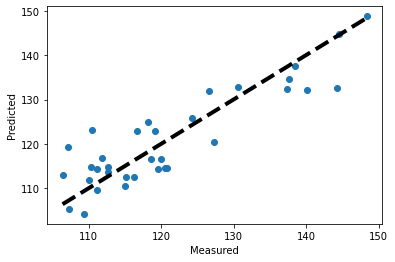

最佳擬合線: LOP =  [3.89] + [0.97] * SBPI
0.7854261363636352
最佳擬合線: LOP =  [-1.51] + [1.02] * SBPI
-0.29530303030303084
最佳擬合線: LOP =  [1.36] + [0.99] * SBPI
0.5682066938037093
最佳擬合線: LOP =  [-0.91] + [1.02] * SBPI
0.8874563106796117
最佳擬合線: LOP =  [2.13] + [0.99] * SBPI
0.9053639240506328
5 fold出來後平均MAE 4.365272152826825
負的MAE -4.365272152826825


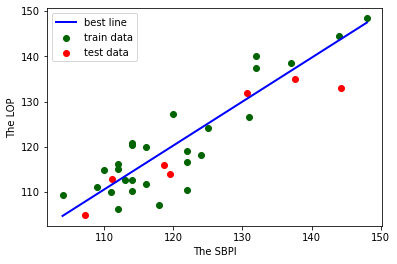

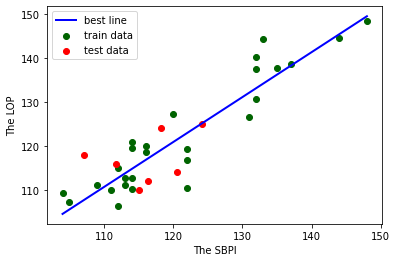

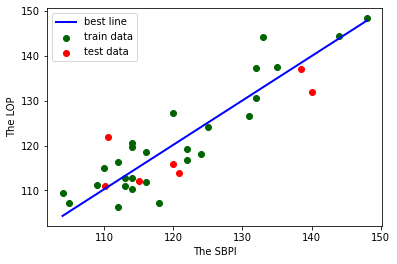

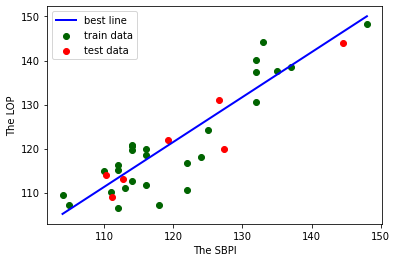

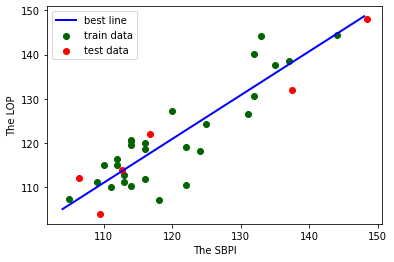

In [12]:
XX=modTIP.SBPI
YY=modTIP.LOP
qqq=np.array(XX)
qqq = np.reshape(qqq, (34,1))
qqqq=np.array(YY)
qqqq = np.reshape(qqqq, (34,1))
# cross_val_score(model, qqq, qqqq, cv=2)
lr=LinearRegression()

predicted = cross_val_predict(lr, qqq, qqqq, cv=30)
fig, ax = plt.subplots()
ax.scatter(qqqq, predicted)
ax.plot([qqqq.min(), qqqq.max()], [qqqq.min(), qqqq.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
# seed = 7
kfold = model_selection.KFold(n_splits=5, shuffle=False)
s = []
for train, validate in kfold.split(qqq, qqqq):
    lrr = LinearRegression()
    lrr.fit(qqq[train], qqqq[train])
    #qqqq[validate]是ground truth
    #qqq[validate]是x_test
    s.append(mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    plt.figure()
    a=lrr.intercept_
    b=lrr.coef_
    X1=np.linspace(qqq.min(),qqq.max(),29)
    Y1=np.round(a,2) + np.round(b[0],2) * X1
    print("最佳擬合線: LOP = ",np.round(a,2),"+",np.round(b[0],2),"* SBPI")
    plt.plot(X1, Y1, color='blue', linewidth=2, label="best line")
    plt.scatter(qqq[train], qqqq[train], color='darkgreen', label="train data")
    plt.scatter(qqqq[validate], qqq[validate], color='red', label="test data")
    plt.legend(loc=2)
    plt.xlabel("The SBPI")
    plt.ylabel("The LOP")
    print(lrr.score(qqqq[validate],lrr.predict(qqq[validate])))#噴三個 R score
print("5 fold出來後平均MAE",np.mean(s))#mse mean
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(lrr, qqq, qqqq, cv=kfold, scoring=scoring)
print("負的MAE",results.mean())

In [13]:
# print(predicted)

自變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)
因變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)


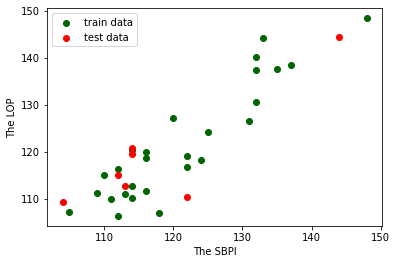

In [14]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBPI,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPI.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)
因變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)


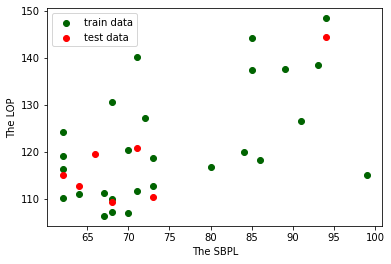

In [15]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.DBPI,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.DBPI.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)
因變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)


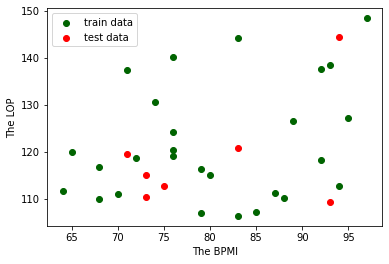

In [16]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(modTIP.BPMI,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.BPMI.shape, "；  訓練集:",X_train3.shape, "；  測試集:",X_test3.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train3.shape, "；  測試集:",Y_test3.shape)
#散點圖
plt.scatter(X_train3, Y_train3, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test3, Y_test3, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The BPMI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

In [17]:
# plt.scatter(modTIP.SBP1, modTIP.TIP, color="darkgreen", label="分布")

In [18]:
# X_1 = np.array([1 for i in range(28)])
# x_train = np.array(X_train)
# x = np.zeros((28,2))
# x[:,0] = X_1
# x[:,1] = x_train
# #線性迴歸訓練
# model = LinearRegression()
# model.fit(x,Y_train)#調用線性迴歸包
# a  = model.intercept_#截距
# b = model.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred = model.predict(x)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
# plt.scatter(X_test, Y_test, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The SBP")#添加 X 軸名稱
# plt.ylabel("The TIP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a,",迴歸係數：",b)
# print("最佳擬合線: Y = ",round(a,2),"+",round(b[1],2),"* X")
# #顯示線性方程，並限制參數的小數位爲兩位

In [19]:
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (27,1))#reshape換成(28,1)
qq = np.array(X_test)
qq = np.reshape(qq, (7,1))

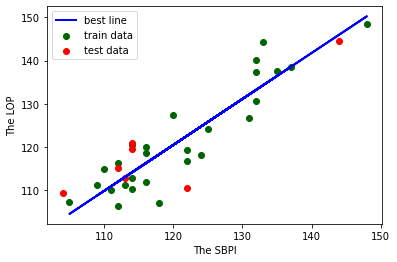

擬合參數:截距 -7.198015415738425 ,迴歸係數： [1.06380887]
最佳擬合線: LOP =  -7.2 + 1.06 * SBPI
0.8315540879273632
5.035777024184488


In [20]:
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train = model.predict(q)#看原本線性
y_train_pred = model.predict(qq)#預測y
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(q, y_train, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: LOP = ",round(a,2),"+",round(b[0],2),"* SBPI")
#顯示線性方程，並限制參數的小數位爲兩位
print(model.score(q,Y_train))#R score
print(mean_absolute_error(Y_test,y_train_pred))

In [21]:
#DBPI
# q2 = np.array(X_train2)#q原先shape是(28,0)
# np.shape(q2)
# q2 = np.reshape(q2, (27,1))#reshape換成(28,1)

In [22]:
# model2 = LinearRegression()
# model2.fit(q2,Y_train2)#調用線性迴歸包
# # model.fit(X_train,Y_train)
# a2  = model2.intercept_#截距
# b2 = model2.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred2 = model2.predict(q2)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train2, y_train_pred2, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train2, Y_train2, color='darkgreen', label="train data")
# plt.scatter(X_test2, Y_test2, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The DBPI")#添加 X 軸名稱
# plt.ylabel("The LOP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a2,",迴歸係數：",b2)
# print("最佳擬合線: LOP = ",round(a2,2),"+",round(b2[0],2),"* DBPI")
# #顯示線性方程，並限制參數的小數位爲兩位
# # mse = mean_squared_error(Y_test2,y_train_pred2)
# model2.score(q2,Y_train2)
# # model2.score(X_test2,Y_test2)

In [23]:
#BPMI
# q3 = np.array(X_train3)#q原先shape是(28,0)
# np.shape(q3)
# q3 = np.reshape(q3, (27,1))#reshape換成(28,1)

In [24]:
# model3 = LinearRegression()
# model3.fit(q3,Y_train3)#調用線性迴歸包
# # model.fit(X_train,Y_train)
# a3  = model3.intercept_#截距
# b3 = model3.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred3 = model3.predict(q3)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train3, y_train_pred3, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train3, Y_train3, color='darkgreen', label="train data")
# plt.scatter(X_test3, Y_test3, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The BPMI")#添加 X 軸名稱
# plt.ylabel("The LOP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a3,",迴歸係數：",b3)
# print("最佳擬合線: LOP = ",round(a3,2),"+",round(b3[0],2),"* BPMI")
# #顯示線性方程，並限制參數的小數位爲兩位
# model3.score(q3,Y_train3)
# # model3.score(X_test3,Y_test3)